### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Reading The Dataset

In [2]:
df = pd.read_csv('dataset/collegePlace.csv')

In [3]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


### Encoding Categorical Data Into Numerical Values 

#### For Gender Column

In [4]:
df['Gender'] = df['Gender'].map({'Male' : 1 , 'Female' : 0})

In [5]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1,1
1,21,0,Computer Science,0,7,1,1,1
2,22,0,Information Technology,1,6,0,0,1
3,21,1,Information Technology,0,8,0,1,1
4,22,1,Mechanical,0,8,1,0,1


#### For Stream Column

In [6]:
df['Stream'] = df['Stream'].map({'Electronics And Communication' : 1,
                  'Computer Science' : 2,
                  'Information Technology' : 3,
                  'Mechanical' : 4,
                  'Electrical' : 5,
                  'Civil' : 6
                 })

In [7]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,1,1,8,1,1,1
1,21,0,2,0,7,1,1,1
2,22,0,3,1,6,0,0,1
3,21,1,3,0,8,0,1,1
4,22,1,4,0,8,1,0,1


### Store Feature Matrix In X and Response(Target) In Vector y
### X = Independent Variables
### y = Dependent Variable

In [8]:
X = df.drop('PlacedOrNot', axis = 1)

In [9]:
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,1,1,8,1,1
1,21,0,2,0,7,1,1
2,22,0,3,1,6,0,0
3,21,1,3,0,8,0,1
4,22,1,4,0,8,1,0
...,...,...,...,...,...,...,...
2961,23,1,3,0,7,0,0
2962,23,1,4,1,7,1,0
2963,22,1,3,1,7,0,0
2964,22,1,2,1,7,0,0


In [10]:
y = df['PlacedOrNot']

In [11]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [12]:
X.shape

(2966, 7)

In [13]:
y.shape

(2966,)

### Splitting The Dataset Into The Training Set And Test Set 

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [15]:
X_train.shape 

(1987, 7)

In [16]:
X_test.shape

(979, 7)

In [17]:
y_train.shape  

(1987,)

In [18]:
y_test.shape

(979,)

### Training The Models

In [19]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svc = SVC()
svc.fit(X_train,y_train)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

### Prediction On Data

In [20]:
y_pred1 = lr.predict(X_test)
y_pred2 = svc.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

### Evaluating The Models

In [21]:
cm1 = confusion_matrix(y_test , y_pred1)
cm2 = confusion_matrix(y_test , y_pred2)
cm3 = confusion_matrix(y_test , y_pred3)
cm4 = confusion_matrix(y_test , y_pred4)
cm5 = confusion_matrix(y_test , y_pred5)
cm6 = confusion_matrix(y_test , y_pred6)

cm1 , cm2 , cm3 , cm4 , cm5 , cm6

(array([[315, 117],
        [128, 419]], dtype=int64),
 array([[343,  89],
        [140, 407]], dtype=int64),
 array([[400,  32],
        [110, 437]], dtype=int64),
 array([[404,  28],
        [ 88, 459]], dtype=int64),
 array([[399,  33],
        [ 87, 460]], dtype=int64),
 array([[413,  19],
        [ 97, 450]], dtype=int64))

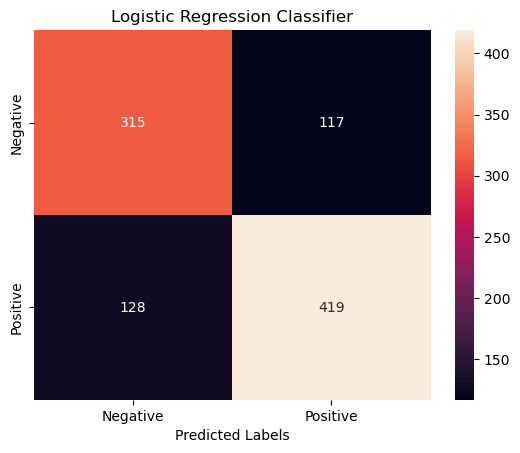

In [22]:
sns.heatmap(cm1 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Labels')
plt.title('Logistic Regression Classifier')
plt.show()

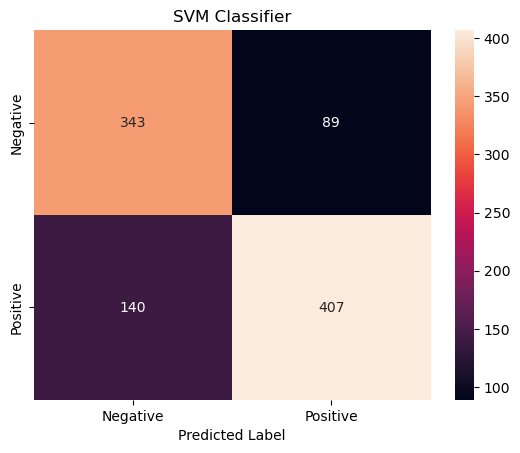

In [23]:
sns.heatmap(cm2 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('SVM Classifier')
plt.show()

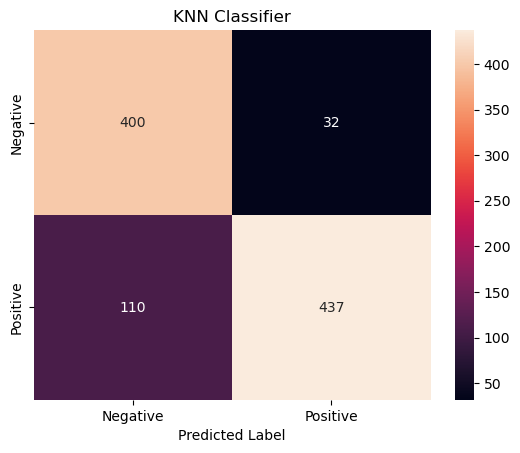

In [24]:
sns.heatmap(cm3 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('KNN Classifier')
plt.show()

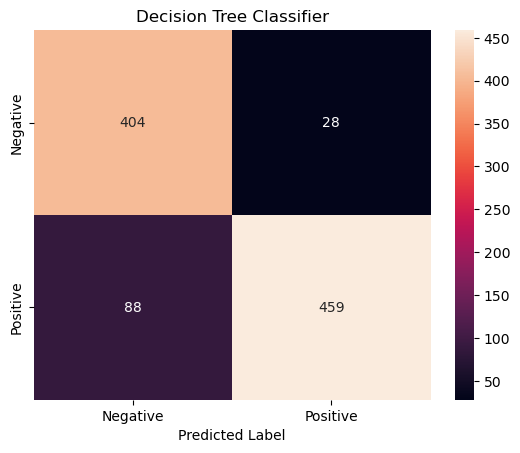

In [25]:
sns.heatmap(cm4 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('Decision Tree Classifier')
plt.show()

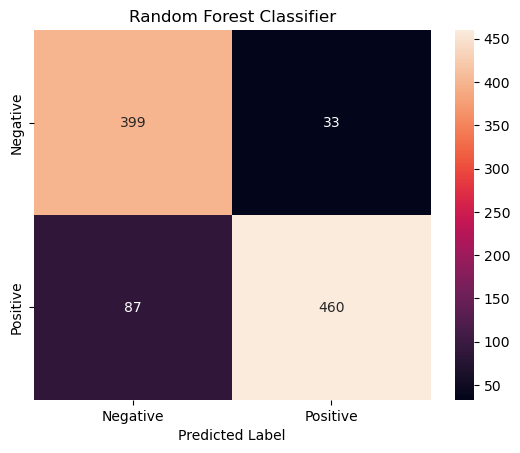

In [26]:
sns.heatmap(cm5 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('Random Forest Classifier')
plt.show()

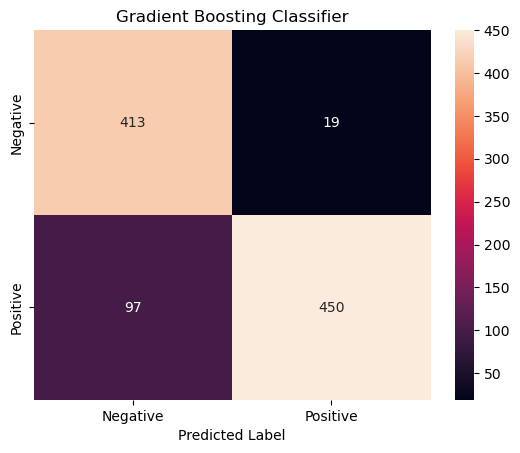

In [27]:
sns.heatmap(cm6 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('Gradient Boosting Classifier')
plt.show()

In [28]:
acc1 = accuracy_score(y_test,y_pred1)
acc2 = accuracy_score(y_test,y_pred2)
acc3 = accuracy_score(y_test,y_pred3)
acc4 = accuracy_score(y_test,y_pred4)
acc5 = accuracy_score(y_test,y_pred5)
acc6 = accuracy_score(y_test,y_pred6)

In [29]:
prec1 = precision_score(y_test,y_pred1)
prec2 = precision_score(y_test,y_pred2)
prec3 = precision_score(y_test,y_pred3)
prec4 = precision_score(y_test,y_pred4)
prec5 = precision_score(y_test,y_pred5)
prec6 = precision_score(y_test,y_pred6)

In [30]:
r1 = recall_score(y_test,y_pred1)
r2 = recall_score(y_test,y_pred2)
r3 = recall_score(y_test,y_pred3)
r4 = recall_score(y_test,y_pred4)
r5 = recall_score(y_test,y_pred5)
r6 = recall_score(y_test,y_pred6)

In [31]:
f1 = f1_score(y_test,y_pred1)
f2 = f1_score(y_test,y_pred2)
f3 = f1_score(y_test,y_pred3)
f4 = f1_score(y_test,y_pred4)
f5 = f1_score(y_test,y_pred5)
f6 = f1_score(y_test,y_pred6)

In [32]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'ACC':[acc1*100,
                   acc2*100,
                   acc3*100,
                   acc4*100,
                   acc5*100,
                   acc6*100],
            'PREC':[prec1*100,
                   prec2*100,
                   prec3*100,
                   prec4*100,
                   prec5*100,
                   prec6*100],
            'RECALL' :[r1*100,
                       r2*100,
                       r3 * 100,
                       r4 * 100,
                       r5 * 100,
                       r6 * 100],
            'F1_SCORE':[f1*100,
                        f2*100,
                        f3 * 100,
                        f4 * 100,
                        f5 * 100,
                        f6 * 100]})

In [33]:
final_data

,Models,ACC,PREC,RECALL,F1_SCORE
0,LR,74.974464,78.171642,76.599634,77.377655
1,SVC,76.608784,82.056452,74.405850,78.044104
2,KNN,85.495403,93.176972,79.890311,86.023622
3,DT,88.151175,94.250513,83.912249,88.781431
4,RF,87.742594,93.306288,84.095064,88.461538
5,GB,88.151175,95.948827,82.266910,88.582677


In [34]:
final_data[final_data['ACC'] == final_data['ACC'].max()]

,Models,ACC,PREC,RECALL,F1_SCORE
3,DT,88.151175,94.250513,83.912249,88.781431
5,GB,88.151175,95.948827,82.266910,88.582677


In [35]:
final_data[final_data['PREC'] == final_data['PREC'].max()]

,Models,ACC,PREC,RECALL,F1_SCORE
5,GB,88.151175,95.948827,82.26691,88.582677


In [36]:
final_data[final_data['RECALL'] == final_data['RECALL'].max()]

,Models,ACC,PREC,RECALL,F1_SCORE
4,RF,87.742594,93.306288,84.095064,88.461538


In [37]:
final_data[final_data['F1_SCORE'] == final_data['F1_SCORE'].max()]

,Models,ACC,PREC,RECALL,F1_SCORE
3,DT,88.151175,94.250513,83.912249,88.781431


### Training The Best Model On Whole Dataset

In [38]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### Prediction On New Data

In [39]:
new_data = pd.DataFrame({'Age' : 21,
                         'Gender' : 1,
                         'Stream' : 2,
                         'Internships' : 0,
                         'CGPA' : 8,
                         'Hostel' : 0,
                         'HistoryOfBacklogs' : 0},index = [0])
new_data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,21,1,2,0,8,0,0


In [40]:
p = rf.predict(new_data)
if p == 1:
    print('Placed')
else:
    print("Not-placed")

Placed
